In [3]:
from spotipy.oauth2 import SpotifyOAuth
from dotenv import load_dotenv
import spotipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize

load_dotenv()

track_attributes = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
oauth_scopes="user-top-read"
t_range = "medium_term"
# sort_attribute="valence"
top_track_ids = []
track_heatmap_index = []
all_track_data = []

auth_manager = SpotifyOAuth(scope=oauth_scopes)
sp = spotipy.Spotify(auth_manager=auth_manager)

user_top_tracks = sp.current_user_top_tracks(time_range=t_range)

for track in user_top_tracks["items"]:
    track_name = track["name"]
    artist_name = track["artists"][0]["name"]
    top_track_ids.append(track["id"])
    track_heatmap_index.append(f"{track_name}-{artist_name}")

audio_analysis = sp.audio_features(top_track_ids)

for track in audio_analysis:
    track_data = []

    for attribute in track_attributes:
        track_data.append(track[attribute])

    all_track_data.append(track_data)

df = pd.DataFrame(all_track_data, index=track_heatmap_index, columns=track_attributes)

<Axes: >

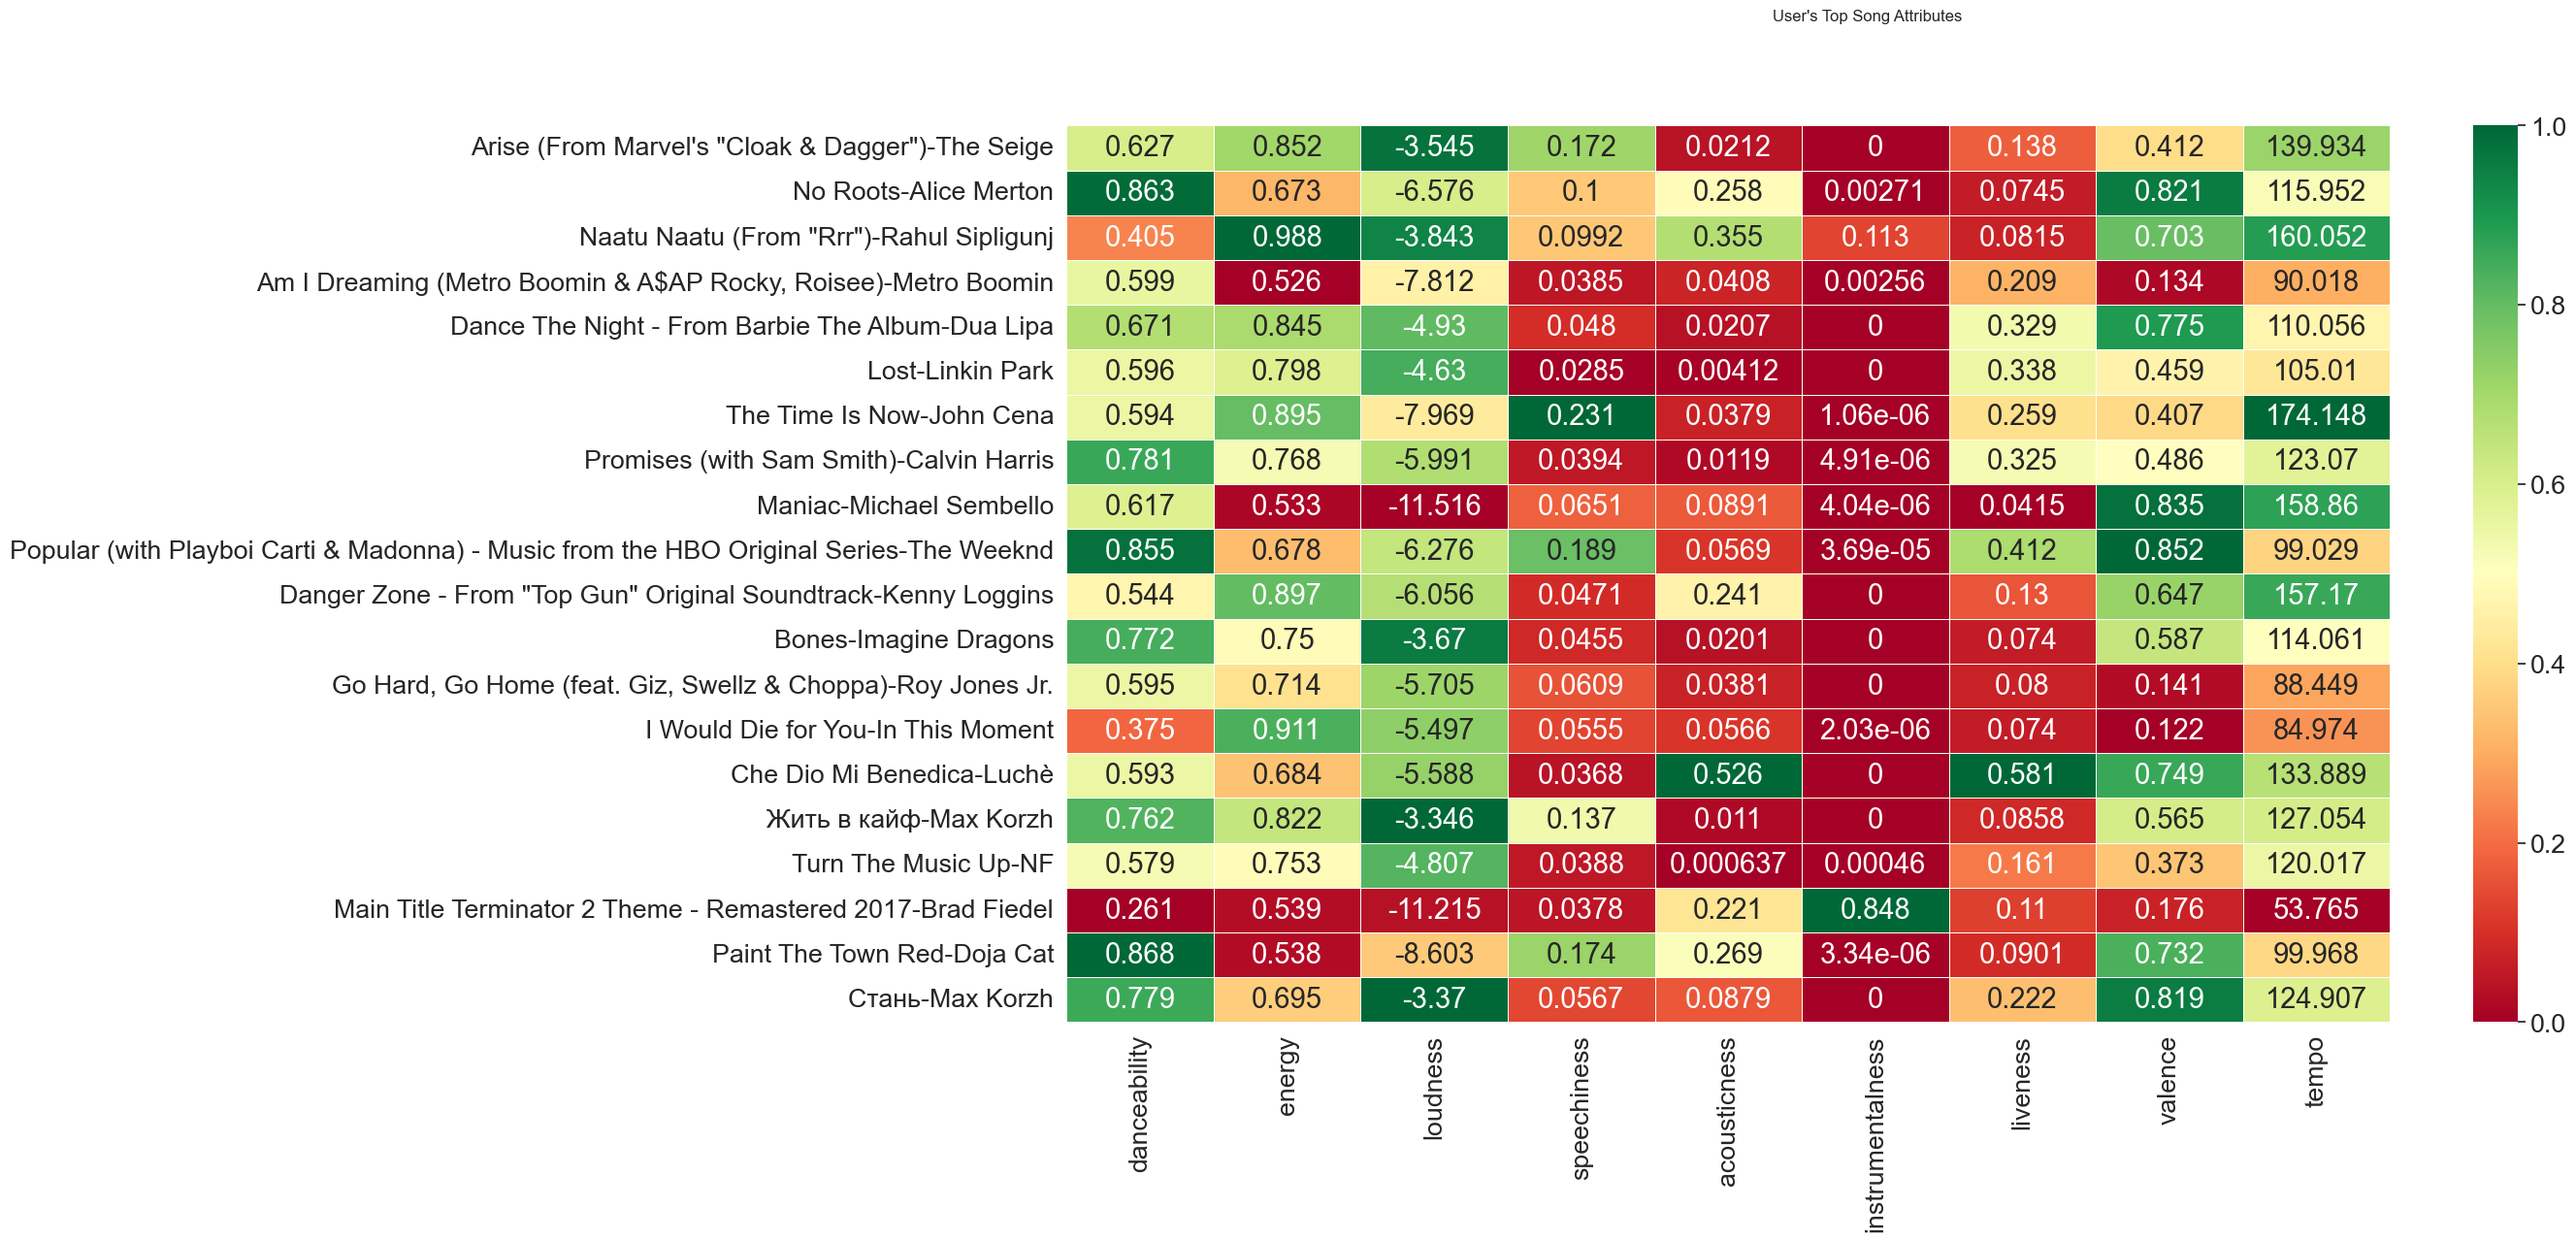

In [4]:
plt.figure(figsize = (22,12))
plt.suptitle("User's Top Song Attributes")

scaled_df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
sns.set(font_scale=1.75)

sns.heatmap(scaled_df, annot=df, linewidths=.5, cmap="RdYlGn", fmt='g')

In [5]:
track_list = []

for track in user_top_tracks["items"]:
    track_data = []

    track_data.append(track["name"])

    artist_name = track["artists"][0]["name"]
    track_data.append(artist_name)

    track_year = track["album"]["release_date"]
    track_data.append(track_year)

    track_data.append(track["popularity"])

    track_list.append(track_data)

df = pd.DataFrame(track_list, columns=["Track Name", "Artist", "Release Date", "Popularity"])
df.sort_values(by=["Popularity"], ascending=False)

,Track Name,Artist,Release Date,Popularity
18,Paint The Town Red,Doja Cat,2023-08-04,93
4,Dance The Night - From Barbie The Album,Dua Lipa,2023-05-25,91
9,Popular (with Playboi Carti & Madonna) - Music...,The Weeknd,2023-06-02,91
11,Bones,Imagine Dragons,2022-07-01,85
3,"Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)",Metro Boomin,2023-06-02,82
7,Promises (with Sam Smith),Calvin Harris,2018-08-17,76
10,"Danger Zone - From ""Top Gun"" Original Soundtrack",Kenny Loggins,1997-03-25,75
5,Lost,Linkin Park,2023-02-10,74
8,Maniac,Michael Sembello,1983-04-11,72
1,No Roots,Alice Merton,2019-01-18,67


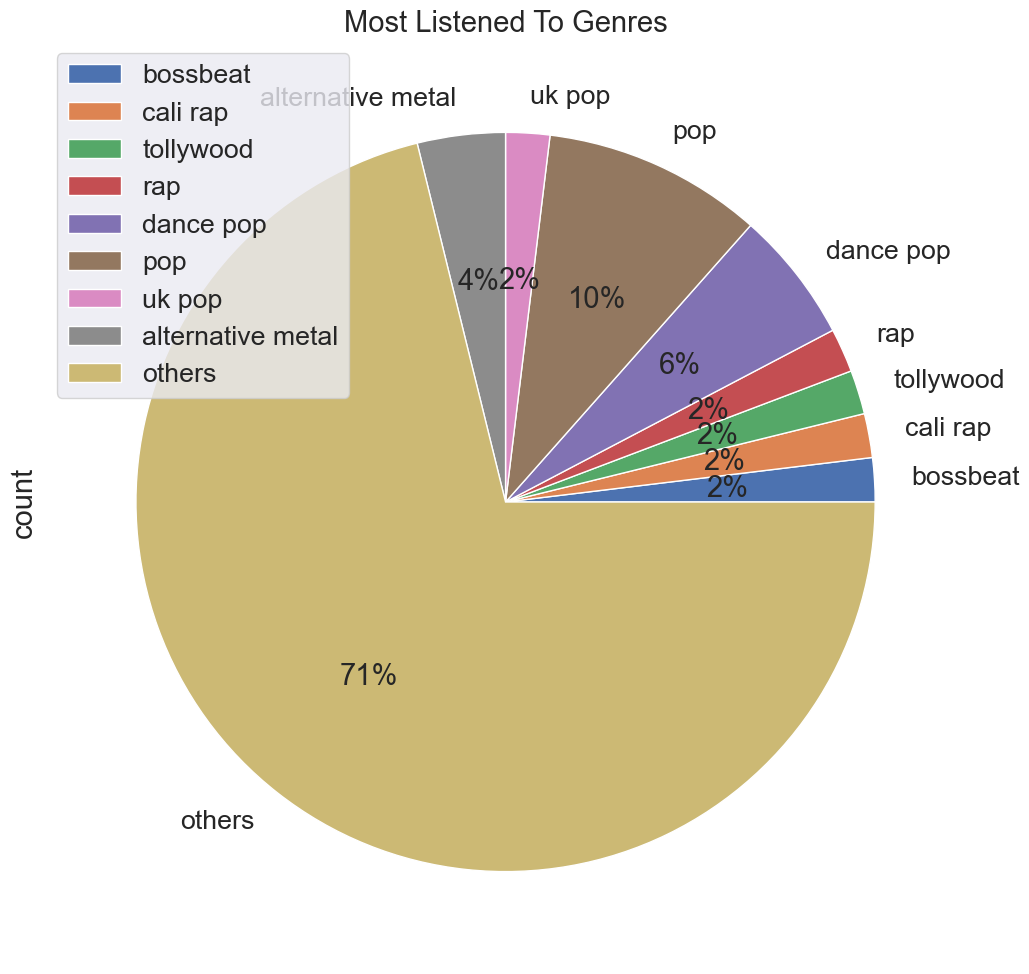

In [6]:
artist_list = []
user_genres_list = []
user_genres_count = []

for track in user_top_tracks["items"]:
    artist_id = track["artists"][0]["id"]
    artist_list.append(sp.artist(artist_id))

user_genres = {}
genre_dict = {"genre": [], "count": []}

for artist in artist_list:
    for genre in artist["genres"]:
        if genre in user_genres:
            user_genres[genre] = user_genres[genre] + 1
        else:
            user_genres[genre] = 1

for genre, count in user_genres.items():
    genre_dict["genre"].append(genre)
    genre_dict["count"].append(count)

df = pd.DataFrame(genre_dict)

df2 = df[:8].copy()

new_row = pd.DataFrame(data = {
    'genre' : ['others'],
    'count' : [df['count'][8:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.plot(kind = 'pie', y = 'count', labels = df2['genre'], figsize=(12, 12), autopct='%1.0f%%', title="Most Listened To Genres")

plt.show()

In [7]:
ARTISTS_SAMPLE_SIZE=20
ARTISTS_OFFSET=0

In [8]:
st_artists = sp.current_user_top_artists(limit=ARTISTS_SAMPLE_SIZE, offset=ARTISTS_OFFSET, time_range='short_term')
mt_artists = sp.current_user_top_artists(limit=ARTISTS_SAMPLE_SIZE, offset=ARTISTS_OFFSET, time_range='medium_term')
lt_artists = sp.current_user_top_artists(limit=ARTISTS_SAMPLE_SIZE, offset=ARTISTS_OFFSET, time_range='long_term')

In [9]:
short_term_top_artists_df = json_normalize(st_artists["items"])
medium_term_top_artists_df = json_normalize(mt_artists["items"])
long_term_top_artists_df = json_normalize(lt_artists["items"])

In [10]:
short_term_top_artists_df = short_term_top_artists_df[['name','popularity','genres', 'followers.total', 'uri']].sort_values(by=['popularity'], ascending=False)
medium_term_top_artists_df = medium_term_top_artists_df[['name','popularity','genres', 'followers.total', 'uri']].sort_values(by=['popularity'], ascending=False)
long_term_top_artists_df = long_term_top_artists_df[['name','popularity','genres', 'followers.total', 'uri']].sort_values(by=['popularity'], ascending=False)

### Short-term Top Artists

In [11]:
short_term_top_artists_df.head(10)

,name,popularity,genres,followers.total,uri
0,50 Cent,82,"[east coast hip hop, gangster rap, hip hop, po...",0,spotify:artist:3q7HBObVc0L8jNeTe5Gofh
1,Akon,79,[dance pop],0,spotify:artist:0z4gvV4rjIZ9wHck67ucSV


### Medium-term Top Artists

In [12]:
medium_term_top_artists_df.head(10)

,name,popularity,genres,followers.total,uri
6,Eminem,90,"[detroit hip hop, hip hop, rap]",0,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR
18,Dua Lipa,86,"[dance pop, pop, uk pop]",0,spotify:artist:6M2wZ9GZgrQXHCFfjv46we
10,Imagine Dragons,85,"[modern rock, pop, rock]",0,spotify:artist:53XhwfbYqKCa1cC15pYq2q
17,Calvin Harris,83,"[dance pop, edm, electro house, house, pop, po...",0,spotify:artist:7CajNmpbOovFoOoasH2HaY
8,Linkin Park,83,"[alternative metal, nu metal, post-grunge, rap...",0,spotify:artist:6XyY86QOPPrYVGvF9ch6wz
5,50 Cent,82,"[east coast hip hop, gangster rap, hip hop, po...",0,spotify:artist:3q7HBObVc0L8jNeTe5Gofh
1,NF,78,"[hip hop, pop rap]",0,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz
12,Ellie Goulding,78,"[indietronica, metropopolis, pop, uk pop]",0,spotify:artist:0X2BH1fck6amBIoJhDVmmJ
2,Fall Out Boy,77,"[emo, modern rock, pop, rock]",0,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX
0,NEFFEX,70,[],0,spotify:artist:3z97WMRi731dCvKklIf2X6


### Long-term Top Artists

In [13]:
long_term_top_artists_df.head(10)

,name,popularity,genres,followers.total,uri
2,Eminem,90,"[detroit hip hop, hip hop, rap]",0,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR
5,Ed Sheeran,87,"[pop, singer-songwriter pop, uk pop]",0,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
6,Coldplay,87,"[permanent wave, pop]",0,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU
11,Dua Lipa,86,"[dance pop, pop, uk pop]",0,spotify:artist:6M2wZ9GZgrQXHCFfjv46we
0,Imagine Dragons,85,"[modern rock, pop, rock]",0,spotify:artist:53XhwfbYqKCa1cC15pYq2q
3,Linkin Park,83,"[alternative metal, nu metal, post-grunge, rap...",0,spotify:artist:6XyY86QOPPrYVGvF9ch6wz
7,Calvin Harris,83,"[dance pop, edm, electro house, house, pop, po...",0,spotify:artist:7CajNmpbOovFoOoasH2HaY
9,NF,78,"[hip hop, pop rap]",0,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz
4,Fall Out Boy,77,"[emo, modern rock, pop, rock]",0,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX
12,Hans Zimmer,75,"[german soundtrack, orchestral soundtrack, sou...",0,spotify:artist:0YC192cP3KPCRWx8zr8MfZ


### Get Top 200 Tracks' Features Data For the 3 Time frames

In [14]:
TRACKS_SAMPLE_SIZE = 1000
TRACKS_OFFSET = 0

In [15]:
st_tracks = sp.current_user_top_tracks(limit=TRACKS_SAMPLE_SIZE, offset=TRACKS_OFFSET, time_range='short_term')
mt_tracks = sp.current_user_top_tracks(limit=TRACKS_SAMPLE_SIZE, offset=TRACKS_OFFSET, time_range='medium_term')
lt_tracks = sp.current_user_top_tracks(limit=TRACKS_SAMPLE_SIZE,offset=TRACKS_OFFSET, time_range='long_term')

In [16]:
short_term_top_tracks_df = json_normalize(st_tracks["items"])
medium_term_top_tracks_df = json_normalize(mt_tracks["items"])
long_term_top_tracks_df = json_normalize(lt_tracks["items"])

In [17]:
properNameFunc = lambda raw_col_value: raw_col_value[0]['name']

short_term_top_tracks_df = short_term_top_tracks_df[['artists', 'name','popularity', 'id', 'duration_ms', 'album.name', 'album.release_date']].sort_values(by=['popularity'], ascending=False)
medium_term_top_tracks_df = medium_term_top_tracks_df[['artists', 'name','popularity', 'id', 'duration_ms', 'album.name', 'album.release_date']].sort_values(by=['popularity'], ascending=False)
long_term_top_tracks_df = long_term_top_tracks_df[['artists', 'name','popularity', 'id', 'duration_ms', 'album.name', 'album.release_date']].sort_values(by=['popularity'], ascending=False)

short_term_top_tracks_df['artists'] = short_term_top_tracks_df['artists'].apply(properNameFunc)
medium_term_top_tracks_df['artists'] = medium_term_top_tracks_df['artists'].apply(properNameFunc)
long_term_top_tracks_df['artists'] = long_term_top_tracks_df['artists'].apply(properNameFunc)

### Short-term Top Tracks

In [18]:
short_term_top_tracks_df.head()

,artists,name,popularity,id,duration_ms,album.name,album.release_date
2,Kenya Grace,Strangers,95,5mjYQaktjmjcMKcUIcqz4s,172964,Strangers,2023-09-01
21,David Kushner,Daylight,93,1odExI7RdWc4BT515LTAwj,212953,Daylight,2023-04-14
34,Akon,Smack That,86,2kQuhkFX7uSVepCD3h29g5,212360,Konvicted,2006-01-01
18,Imagine Dragons,Bones,85,54ipXppHLA8U4yqpOFTUhr,165264,Mercury - Acts 1 & 2,2022-07-01
1,50 Cent,In Da Club,84,7iL6o9tox1zgHpKUfh9vuC,193466,Get Rich Or Die Tryin',2003-02-06


### Medium-term Top Tracks

In [19]:
medium_term_top_tracks_df.head()

,artists,name,popularity,id,duration_ms,album.name,album.release_date
31,Kenya Grace,Strangers,95,5mjYQaktjmjcMKcUIcqz4s,172964,Strangers,2023-09-01
36,David Kushner,Daylight,93,1odExI7RdWc4BT515LTAwj,212953,Daylight,2023-04-14
18,Doja Cat,Paint The Town Red,93,2IGMVunIBsBLtEQyoI1Mu7,231750,Paint The Town Red,2023-08-04
4,Dua Lipa,Dance The Night - From Barbie The Album,91,1vYXt7VSjH9JIM5oRRo7vA,176579,Dance The Night (From Barbie The Album),2023-05-25
9,The Weeknd,Popular (with Playboi Carti & Madonna) - Music...,91,6WzRpISELf3YglGAh7TXcG,215466,Popular (Music from the HBO Original Series),2023-06-02


### Long-term Top Tracks

In [20]:
long_term_top_tracks_df.head()

,artists,name,popularity,id,duration_ms,album.name,album.release_date
19,Taylor Swift,Don’t Blame Me,90,1R0a2iXumgCiFb7HEZ7gUE,236413,reputation,2017-11-10
4,Imagine Dragons,Bones,85,54ipXppHLA8U4yqpOFTUhr,165264,Mercury - Acts 1 & 2,2022-07-01
11,Calvin Harris,Outside (feat. Ellie Goulding),84,7MmG8p0F9N3C4AXdK6o6Eb,227266,Motion,2014-10-31
17,Eminem,Lose Yourself,84,1v7L65Lzy0j0vdpRjJewt1,322226,Just Lose It,2004-01-01
43,Elley Duhé,MIDDLE OF THE NIGHT,82,58HvfVOeJY7lUuCqF0m3ly,184447,MIDDLE OF THE NIGHT,2020-01-10


### Fetch the top 1000 songs for each time frame and calculate the weighted average

In [22]:
trends_set = [
    { 'ref': long_term_top_tracks_df,   'term': 'Long'   },
    { 'ref': medium_term_top_tracks_df, 'term': 'Medium' },
    { 'ref': short_term_top_tracks_df,  'term': 'Short'  }
]

trend_loudness = {}
trend_tempo = {}
trend_mode = {}
trend_danceability = {}
trend_energy = {}
trend_speechiness = {}
trend_acousticness = {}
trend_instrumentalness = {}
trend_liveness = {}
trend_valence = {}

for df_item in trends_set:
    dict_data = df_item['ref'].to_dict(orient='index')
    track_popularity = {v['id']: v['popularity'] for k,v in dict_data.items()}

    try:
        tracks_list_features = sp.audio_features(track_popularity.keys())
    except:
        print("Couldn't get Track Features Analytics")
        continue
        tracks_list_features
    track_analytics = pd.DataFrame(tracks_list_features)
    track_analytics['popularity'] = track_analytics['id'].map(track_popularity)

    trend_loudness[df_item['term']] = np.average(track_analytics['loudness'], weights=track_analytics['popularity'])
    trend_tempo[df_item['term']] = np.average(track_analytics['tempo'], weights=track_analytics['popularity'])
    trend_mode[df_item['term']] = np.average(track_analytics['mode'], weights=track_analytics['popularity'])
    trend_danceability[df_item['term']] = np.average(track_analytics['danceability'], weights=track_analytics['popularity'])
    trend_energy[df_item['term']] = np.average(track_analytics['energy'], weights=track_analytics['popularity'])
    trend_speechiness[df_item['term']] = np.average(track_analytics['speechiness'], weights=track_analytics['popularity'])
    trend_acousticness[df_item['term']] = np.average(track_analytics['acousticness'], weights=track_analytics['popularity'])
    trend_instrumentalness[df_item['term']] = np.average(track_analytics['instrumentalness'], weights=track_analytics['popularity'])
    trend_liveness[df_item['term']] = np.average(track_analytics['liveness'], weights=track_analytics['popularity'])
    trend_valence[df_item['term']] = np.average(track_analytics['valence'], weights=track_analytics['popularity'])

### Short-term Track List Features Table

In [23]:
track_analytics.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.628,0.523,11,-8.307,0,0.0946,0.7010,0.002740,0.2190,0.416,169.982,audio_features,5mjYQaktjmjcMKcUIcqz4s,spotify:track:5mjYQaktjmjcMKcUIcqz4s,https://api.spotify.com/v1/tracks/5mjYQaktjmjc...,https://api.spotify.com/v1/audio-analysis/5mjY...,172965,4,95
1,0.508,0.430,2,-9.475,0,0.0335,0.8300,0.000441,0.0930,0.324,130.090,audio_features,1odExI7RdWc4BT515LTAwj,spotify:track:1odExI7RdWc4BT515LTAwj,https://api.spotify.com/v1/tracks/1odExI7RdWc4...,https://api.spotify.com/v1/audio-analysis/1odE...,212954,4,93
2,0.939,0.742,5,-5.171,0,0.0467,0.3210,0.000000,0.1070,0.924,118.978,audio_features,2kQuhkFX7uSVepCD3h29g5,spotify:track:2kQuhkFX7uSVepCD3h29g5,https://api.spotify.com/v1/tracks/2kQuhkFX7uSV...,https://api.spotify.com/v1/audio-analysis/2kQu...,212360,4,86
3,0.772,0.750,5,-3.670,0,0.0455,0.0201,0.000000,0.0740,0.587,114.061,audio_features,54ipXppHLA8U4yqpOFTUhr,spotify:track:54ipXppHLA8U4yqpOFTUhr,https://api.spotify.com/v1/tracks/54ipXppHLA8U...,https://api.spotify.com/v1/audio-analysis/54ip...,165265,4,85
4,0.899,0.713,6,-2.752,0,0.3660,0.2550,0.000000,0.0708,0.777,90.051,audio_features,7iL6o9tox1zgHpKUfh9vuC,spotify:track:7iL6o9tox1zgHpKUfh9vuC,https://api.spotify.com/v1/tracks/7iL6o9tox1zg...,https://api.spotify.com/v1/audio-analysis/7iL6...,193467,4,84


## Audio Features Analysis Results

Descriptions below are taken from Spotify's API description - [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features)

__Loundness__ - The overall loudness in decibels (dB).

__Tempo__ - The overall estimated tempo of the section in beats per minute (BPM).

__Mode__ - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 0 for “minor”, a 1 for “major”

__Acousticness__ - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

__Danceability__ - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

__Energy__ - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

__Instrumentalness__ - \tPredicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0

__Liveness__ - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

__Speechiness__ - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music

__Valence__ - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.

### Results

In [27]:
results_analytics = pd.DataFrame([trend_loudness, trend_tempo, trend_mode, trend_danceability, trend_energy, trend_speechiness, trend_acousticness, trend_instrumentalness, trend_liveness, trend_valence])
results_analytics.index = ['Loudness', 'Tempo', 'Modality', 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
results_analytics

,Long,Medium,Short
Loudness,-5.275879,-6.119797,-6.383851
Tempo,129.433303,124.289256,117.447829
Modality,0.469052,0.501489,0.437280
Danceability,0.605370,0.641429,0.630749
Energy,0.771794,0.733154,0.694344
Speechiness,0.109683,0.102660,0.114677
Acousticness,0.104662,0.178546,0.185571
Instrumentalness,0.043217,0.055414,0.094696
Liveness,0.209131,0.192193,0.167768
Valence,0.464996,0.491007,0.505642
